<a href="https://www.kaggle.com/code/guptaayushman24/spaceship-2?scriptVersionId=146096300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Problem Statement

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [2]:
data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

Checking the shape of the dataset

In [3]:
data.shape

(8693, 14)

Data contains 8693 rows and 14 columns

Seeing the top 5 records of the dataset

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Checking the duplicates in the dataset

In [5]:
data.duplicated().sum()

0

No duplicate record present in the dataset

Dropping the passenger_id column from the dataset

In [6]:
data.drop('PassengerId',axis=1,inplace=True)

In [7]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Dropping the name column of the passenger

In [8]:
data.drop('Name',axis=1,inplace=True)

In [9]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Checking if there is null value present in the dataset

In [10]:
data.isnull().sum().sum()

2124

In [11]:
data.shape

(8693, 12)

The missing values in the dataset is about 24% of the total data in the dataset so we cannot drop the missing values directly instead we will replace it

Seperating the columns on the basis of the dataset that is numerical or categorical

In [12]:
data['HomePlanet'].dtype

dtype('O')

In [13]:
lst_num=[] # These list will store all the numerical columns of the dataset
lst_cat=[] # These list will store all the categorical columns of the dataset

In [14]:
for i in data.columns :
    if (data[i].dtype=='O') :
        lst_cat.append(i)
    else :
        lst_num.append(i)

In [15]:
lst_num

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

In [16]:
data['Transported'].dtype

dtype('bool')

In [17]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Checking the null values in the categorical columns

In [18]:
for i in lst_cat :
    print("The number of null values in the {} column is {}".format(i,data[i].isnull().sum()))
    

The number of null values in the HomePlanet column is 201
The number of null values in the CryoSleep column is 217
The number of null values in the Cabin column is 199
The number of null values in the Destination column is 182
The number of null values in the VIP column is 203


Replacing the null values in the of the categorical column with the help of the mode

In [19]:
for i in lst_cat :
    data[i] = data[i].fillna(data[i].mode()[0])

In [20]:
for i in lst_cat :
    print("The mode of the {} column is {}".format(i,data[i].mode()[0]))

The mode of the HomePlanet column is Earth
The mode of the CryoSleep column is False
The mode of the Cabin column is G/734/S
The mode of the Destination column is TRAPPIST-1e
The mode of the VIP column is False


In [21]:
lst_num

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

Checking the outliers in the numerical columns if any outliers are present or not


In [22]:
def outlier(df,variable) :
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-1.5*iqr
    higher_fence = q3+1.5*iqr
    return lower_fence,higher_fence

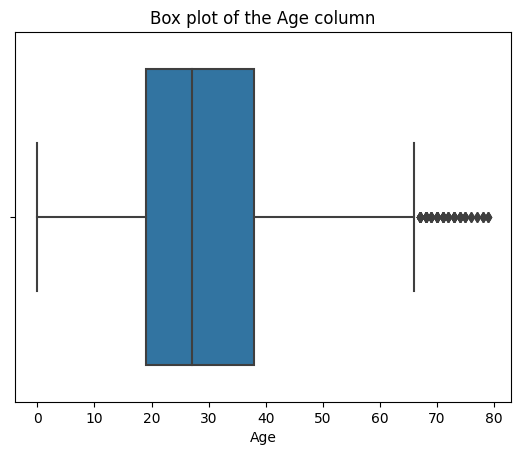

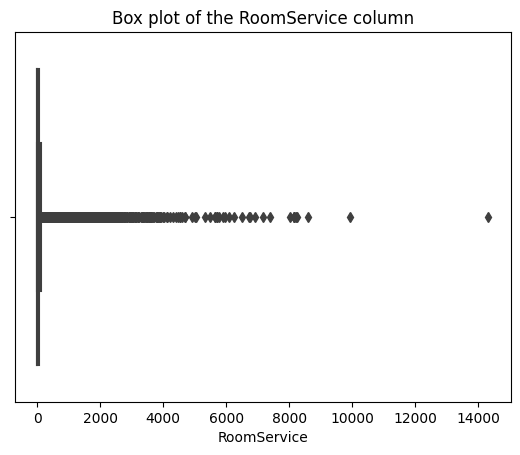

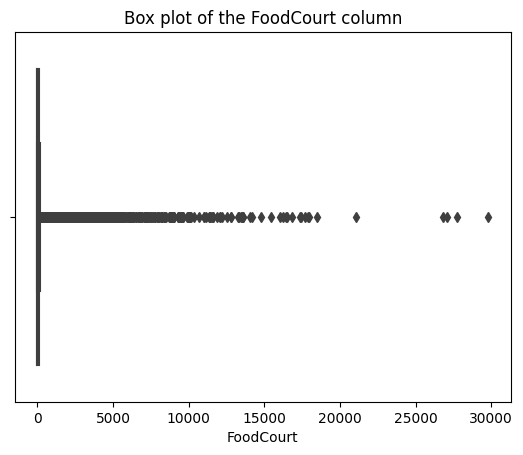

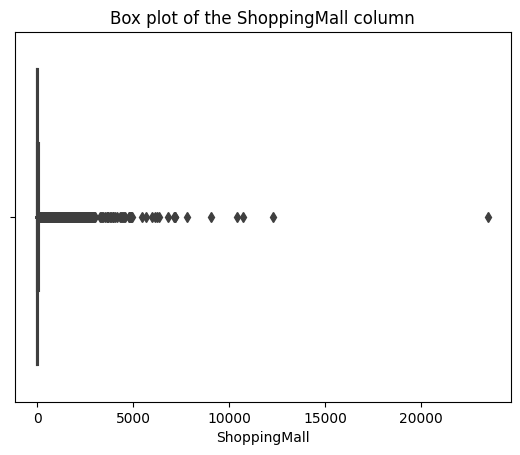

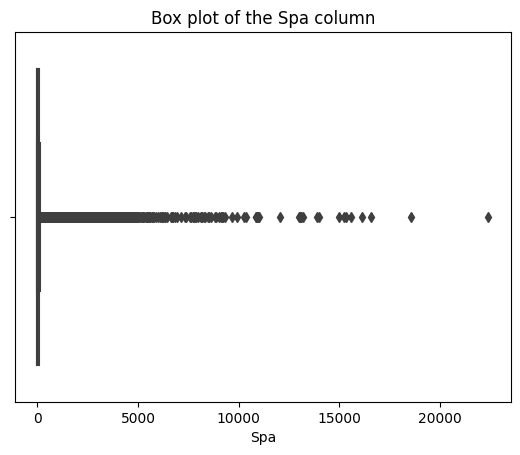

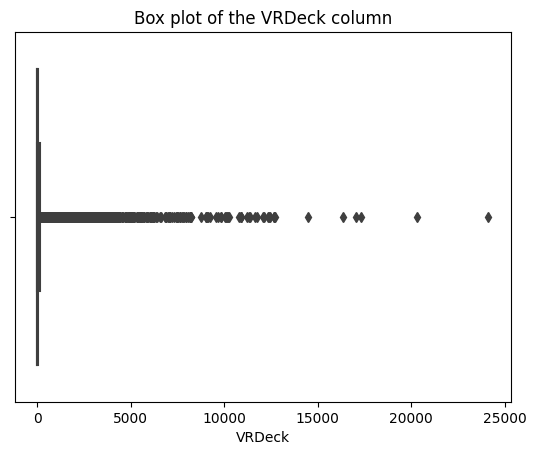

In [23]:
for i in lst_num :
    if (i=='Transported') :
        break
    plt.title('Box plot of the {} column'.format(i))
    sns.boxplot(data=data,x=data[i])
    plt.show()

Checking the missing values in the numerical columns

In [24]:
for i in lst_num :
    print('Number of missing values in the {} column is {}'.format(i,data[i].isnull().sum()))

Number of missing values in the Age column is 179
Number of missing values in the RoomService column is 181
Number of missing values in the FoodCourt column is 183
Number of missing values in the ShoppingMall column is 208
Number of missing values in the Spa column is 183
Number of missing values in the VRDeck column is 188
Number of missing values in the Transported column is 0


Replacing the null values with the median of the numerical columns

In [25]:
for i in lst_num :
    data[i] = data[i].fillna(data[i].median())
    

In [26]:
for i in lst_num :
    print('Number of missing values in the {} column is {}'.format(i,data[i].isnull().sum()))

Number of missing values in the Age column is 0
Number of missing values in the RoomService column is 0
Number of missing values in the FoodCourt column is 0
Number of missing values in the ShoppingMall column is 0
Number of missing values in the Spa column is 0
Number of missing values in the VRDeck column is 0
Number of missing values in the Transported column is 0


Univariate Analysis

([<matplotlib.patches.Wedge at 0x7bb7b6746170>,
 [Text(0.18065168624423034, -1.085064499583834, 'Earth'),
  Text(0.4988757573000687, 0.9803687973300064, 'Europa'),
  Text(-0.8851278775740178, 0.6531069134079923, 'Mars')],
 [Text(0.09853728340594381, -0.591853363409364, '55.3%'),
  Text(0.2721140494364011, 0.534746616725458, '24.5%'),
  Text(-0.4827970241312824, 0.3562401345861776, '20.2%')])

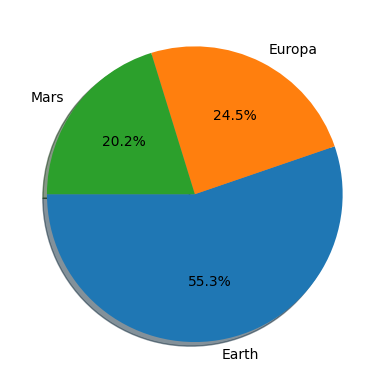

In [27]:
# Plotting the pie chart of the HomePlanet
name_home = data['HomePlanet'].value_counts().index.tolist()
count_home = data['HomePlanet'].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(count_home, labels=name_home, autopct='%1.1f%%',shadow=True,startangle=180)

From the above graph we can see that in the spaceship the population of the people from the Earth are more

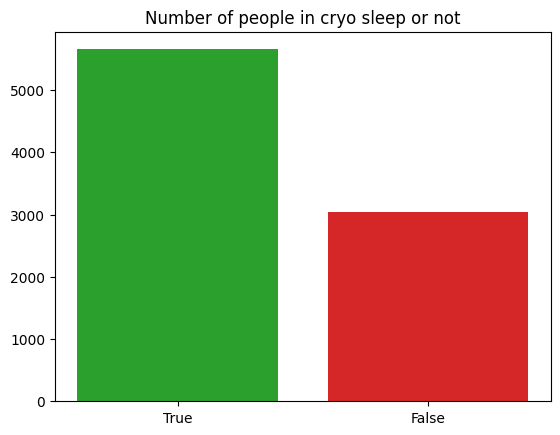

In [28]:
# Plotting the bar chat of the people who are in the cryo sleep
import matplotlib.pyplot as plt

# Your data
cryo_sleep_number = data['CryoSleep'].value_counts().tolist()
cryo_sleep_labels = ['True', 'False'] 

bar_colors = ['tab:green', 'tab:red']  # Adjust the colors as needed

fig, ax = plt.subplots()

# Create the bar plot with automatic x-axis labels
ax.bar(cryo_sleep_labels, cryo_sleep_number, color=bar_colors)

ax.set_title('Number of people in cryo sleep or not')
plt.show()




From the above graph we can see that maximum people are in the cryosleep

Text(0, 0.5, 'Frequency of different age')

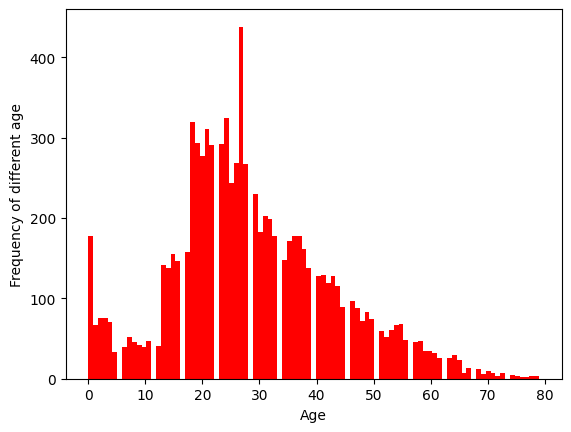

In [29]:
# Plotting the age column for seeing the distribution of Age
from math import sqrt
no_of_bins = sqrt(data.shape[0])
bin_width = [data['Age'].min(),data['Age'].max()]
hist_color='red'
plt.hist(data['Age'],bins=round(no_of_bins),range=bin_width,color=hist_color)
plt.xlabel('Age')
plt.ylabel('Frequency of different age')

From the above graph we can see that there are many people who are above 25 and lesy s than 30 and there are very few people who are between 70 to 80

In [30]:
data['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of people who take the VIP service and percentage who did not take the VIP service')

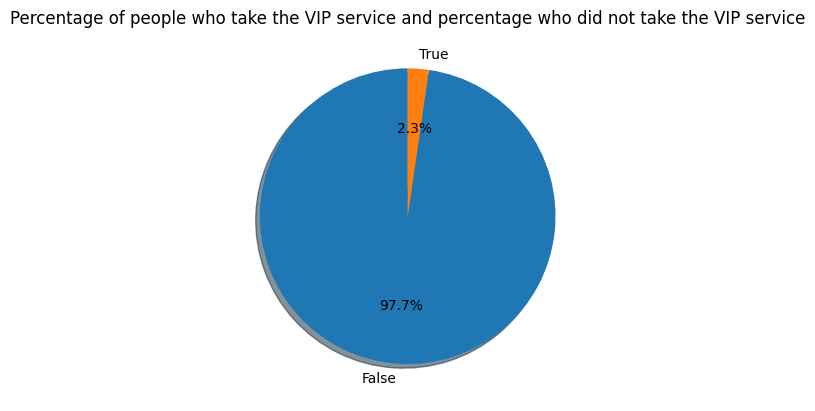

In [31]:
# Plotting the pie chart of the VIP column 
# VIP-> Passenger who take the VIP service for the travelling
bool_VIP = data['VIP'].value_counts().index.tolist()
count_vip = data['VIP'].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(count_vip, labels=bool_VIP, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Percentage of people who take the VIP service and percentage who did not take the VIP service')


From the above pie chart we can see that there are very few people who took the VIP services around 97.1% people did not take the VIP service and aroung 2.3% people take the VIP service

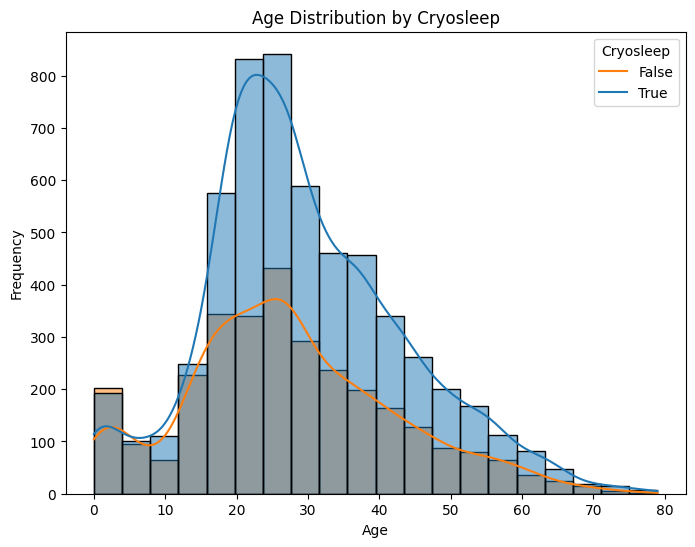

In [32]:
# Analysis of the Age vs CryoSleep

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=data['Age'], hue=data['CryoSleep'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Cryosleep')
plt.legend(title='Cryosleep', labels=['False', 'True'])
plt.show()

From the above graph we can see that the people whose age around 20 to 30 are in cryosleep means youngsters are more in cryosleep than older ones

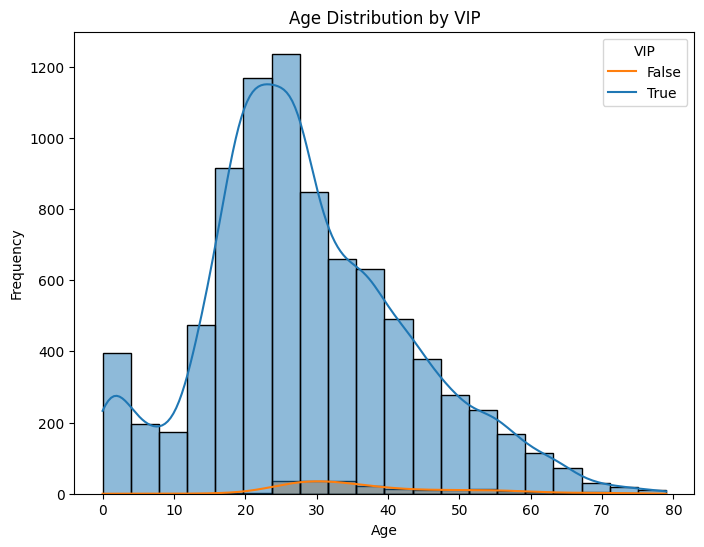

In [33]:
# Analysis of the Age vs VIP

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=data['Age'], hue=data['VIP'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by VIP')
plt.legend(title='VIP', labels=['False', 'True'])
plt.show()

In [34]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [35]:
# Creating the new column in the dataset
data['Total_Expense'] = data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck']

In [36]:
data['Total_Expense'].head()

0        0.0
1      736.0
2    10383.0
3     5176.0
4     1091.0
Name: Total_Expense, dtype: float64

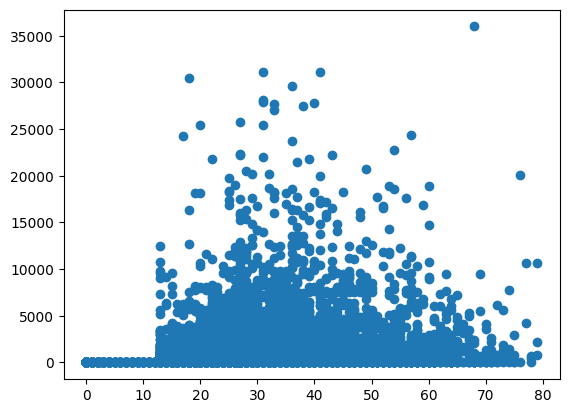

In [37]:
plt.scatter(data['Age'],data['Total_Expense'])

From the above graph we can see that the people who hava age from 30 to 50 years have more expenses than others some older people also have the more expenses

In [38]:
data['Transported'].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7bb7b1a27850>,
 [Text(0.01252200868813063, -1.0999287246446539, 'True'),
  Text(-0.012522008688130496, 1.0999287246446539, 'False')],
 [Text(0.006830186557162161, -0.5999611225334475, '50.4%'),
  Text(-0.006830186557162088, 0.5999611225334475, '49.6%')])

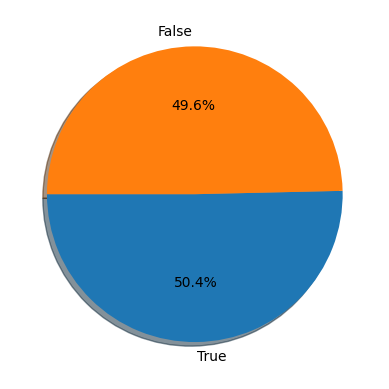

In [39]:
Transported_bool = data['Transported'].value_counts().index.tolist()
count_Transported = data['Transported'].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(count_Transported, labels=Transported_bool, autopct='%1.1f%%',shadow=True,startangle=180)

From the above graph we can see thaht mostly people get transported into the another dimmension around 50.4% people get transported and around 49.6% people are not transported

In [40]:
data['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

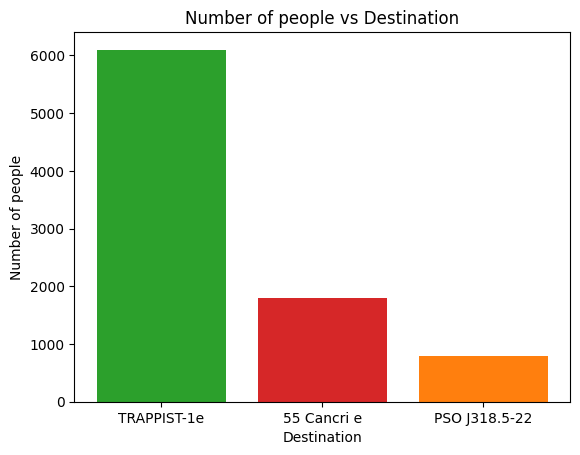

In [41]:
destination_number = data['Destination'].value_counts().tolist()
destination_name = data['Destination'].value_counts().index
bar_colors = ['tab:green',  'tab:red', 'tab:orange']

fig, ax = plt.subplots()


ax.bar(destination_name, destination_number, color=bar_colors)

ax.set_title('Number of people vs Destination')
plt.xlabel('Destination')
plt.ylabel('Number of people')
plt.show()


From the above graph we can see that the most of the people are transported to the TRSPPIST-1e planet

In [42]:
data.groupby('Destination')['HomePlanet'].value_counts().unstack(fill_value=0)

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,721,886,193
PSO J318.5-22,728,19,49
TRAPPIST-1e,3354,1226,1517


In [43]:
lst_homeplanet=data.groupby('Destination')['HomePlanet'].value_counts().unstack(fill_value=0).columns.tolist()

In [44]:
lst_homeplanet

['Earth', 'Europa', 'Mars']

Text(0.5, 1.0, 'Percentage of people who are transferred to 55 Cancri e planet')

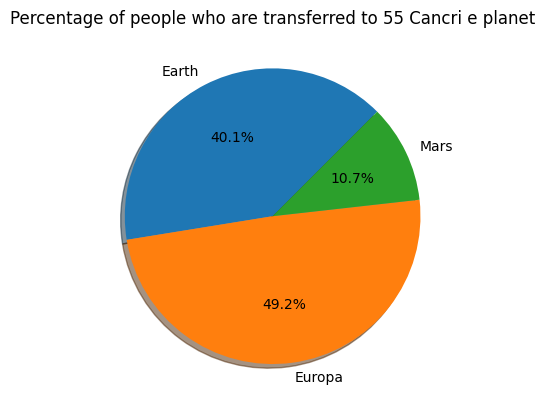

In [45]:
# Pie chart of the 55_Cancri_e
number = [721,886,193]
lst = lst_homeplanet

fig, ax = plt.subplots()
ax.pie(number, labels=lst, autopct='%1.1f%%',shadow=True,startangle=45)
plt.title('Percentage of people who are transferred to 55 Cancri e planet')

From the above pie chart we can see that more people from Europa are transferred to the 55 Cancri e planet

Text(0.5, 1.0, 'Percentage of people who are transferred to PSO J318.5-22 Planet')

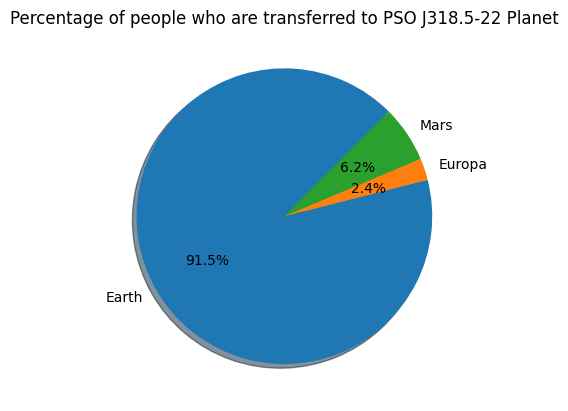

In [46]:
# Pie chart of the PSO J318.5-22
number = [728,19,49]
lst = lst_homeplanet

fig, ax = plt.subplots()
ax.pie(number, labels=lst, autopct='%1.1f%%',shadow=True,startangle=45)
plt.title('Percentage of people who are transferred to PSO J318.5-22 Planet')

From the above pie chart we can see that more people from Earth are transferred to the PSO J318.5-22 Planet

Text(0.5, 1.0, 'Percentage of people who are transferred to TRAPPIST Planet')

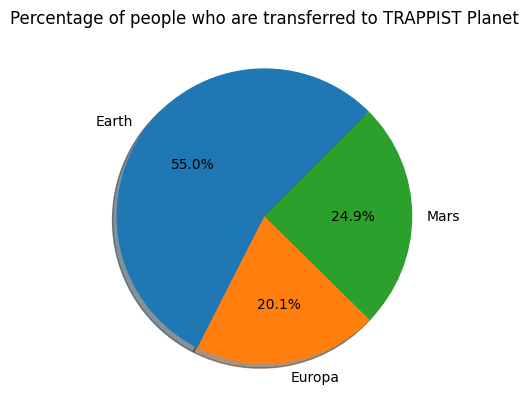

In [47]:
# Pie chart of the TRAPPIST-1e	
number = [3354,1226,1517]
lst = lst_homeplanet

fig, ax = plt.subplots()
ax.pie(number, labels=lst, autopct='%1.1f%%',shadow=True,startangle=45)
plt.title('Percentage of people who are transferred to TRAPPIST Planet')

From the above pie chart we can see that more people from Earth are transferred to the TRAPPIST Planet

From the above three pie chart we can conclude that there are more people from the Earth in the spacehip because out of two out of three pie chart Earth is dominating

****Encoding of the categorical column into the numerical columns****

In [48]:
# Frequecny Encoding of the HomePlanet
data['HomePlanet'] = data['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [49]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_Expense
0,2,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
2,2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,2,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


In [50]:
# Doing Binary Encoding on the CryoSleep column
data['CryoSleep'] = data['CryoSleep'].map({True:1,False:0})

In [51]:
# Frequency Encoding on the Destination
data['Destination'] = data['Destination'].map({'TRAPPIST-1e':1,'55 Cancri e':2,'PSO J318.5-22':3})

In [52]:
# Doing Binary Encoding on the VIP column
data['VIP'] = data['VIP'].map({True:1,False:0})

In [53]:
# Doing Binary Encoding on the VIP column
data['Transported'] = data['Transported'].map({True:1,False:0})

## Checking the correlation of the Cabin Column with the target column which is Transported column

In [54]:
from pandas import factorize

labels, categories = factorize(data['Cabin'])
data["labels"] = labels
abs(data['Transported'].corr(data["labels"]))*100

2.2223929931536888

From the above result we can see that there is very weak correlation of the Cabin column with the target column which is Transported column so we are dropping the Cabin Column

Dropping the labels column

In [55]:
data.drop('labels',axis=1,inplace=True)

In [56]:
data.drop('Cabin',axis=1,inplace=True) 

## Checking the multicollinearity of all the features with the help of the heat map

In [57]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_Expense
0,2,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,1,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,736.0
2,2,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
3,2,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
4,1,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0


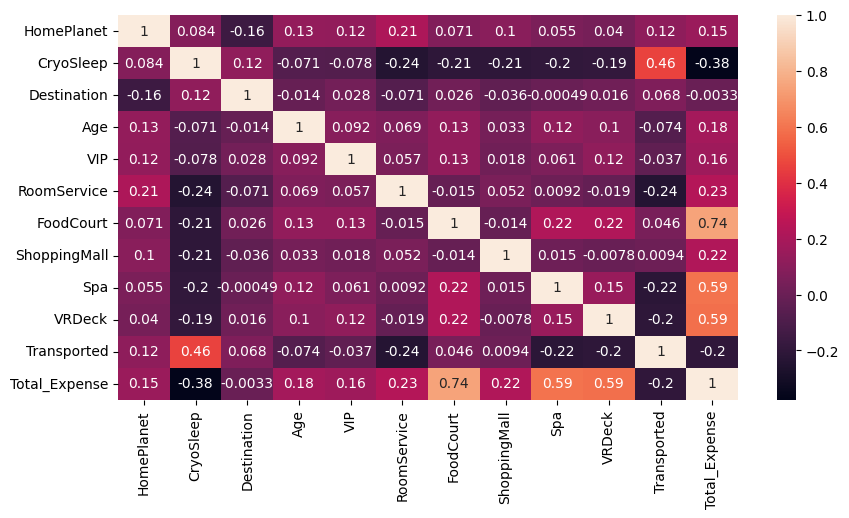

In [58]:
# Plotting the heat map 
fig, ax = plt.subplots(figsize=(10, 5))
dataplot = sns.heatmap(data.corr(numeric_only=True), annot=True, ax=ax)

# Display the heatmap
plt.show()

# Now we will do the feature selection and will take those feature which are highly correlated with the target column